# Loading data in python environment

In [1]:
import pandas as pd  
mydata = pd.read_csv('Sales_data_zone_wise.csv')  
print(mydata.head())  

       Month  Zone - A  Zone - B  Zone - C  Zone - D
0  Month - 1   1483525   1748451   1523308   2267260
1  Month - 2   1238428   1707421   2212113   1994341
2  Month - 3   1860771   2091194   1282374   1241600
3  Month - 4   1871571   1759617   2290580   2252681
4  Month - 5   1244922   1606010   1818334   1326062


# Checking for null values present or not 

In [3]:
 nul_value=pd.isnull(mydata)
nul_value.sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

# Mean sales generated my each zone using python

In [4]:
print(mydata['Zone - A'].mean())
print(mydata['Zone - B'].mean())
print(mydata['Zone - C'].mean())
print(mydata['Zone - D'].mean())

1540493.1379310344
1755559.5862068965
1772871.0344827587
1842926.7586206896


# Adding another column for storing sum of sales of each zone by month

In [7]:
sumofsale=(mydata['Zone - A']+mydata['Zone - B']+mydata['Zone - C']+mydata['Zone - D'])
mydata['sumof4zones']=sumofsale
mydata.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D,sumof4zones
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328


# filtering sumof4zones and month into another data frame called slice_data for easier visualization

In [8]:
slice_data=mydata[['Month','sumof4zones']]
print(slice_data)

         Month  sumof4zones
0    Month - 1      7022544
1    Month - 2      7152303
2    Month - 3      6475939
3    Month - 4      8174449
4    Month - 5      5995328
5    Month - 6      7151387
6    Month - 7      7287108
7    Month - 8      7816299
8    Month - 9      6703395
9   Month - 10      7128210
10  Month - 11      7032783
11  Month - 12      6111084
12  Month - 13      5925424
13  Month - 14      7155515
14  Month - 15      5934156
15  Month - 16      6506659
16  Month - 17      7149383
17  Month - 18      7083490
18  Month - 19      6971953
19  Month - 20      7124599
20  Month - 21      7389597
21  Month - 22      7560001
22  Month - 23      6687919
23  Month - 24      7784747
24  Month - 25      6095918
25  Month - 26      6512360
26  Month - 27      6267918
27  Month - 28      7470920
28  Month - 29      6772277


# Checking whether any significant difference among sales values of each zones using anova test

# Null Hypothesis – There are no significant differences among different zones sales amount.

# step 1: melt() function is used to reshape a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars).Here measures variables are zone columns with respect to identifier variable Month coulmn

In [9]:
data_melt = pd.melt(mydata.reset_index(), id_vars=['Month'],value_vars=['Zone - A','Zone - B','Zone - C','Zone - D'])

# step2:provided appropriate column names


In [10]:
data_melt.columns = ['Month', 'treatments', 'sales']
data_melt.head(5)

,Month,treatments,sales
0,Month - 1,Zone - A,1483525
1,Month - 2,Zone - A,1238428
2,Month - 3,Zone - A,1860771
3,Month - 4,Zone - A,1871571
4,Month - 5,Zone - A,1244922


# step 3: Boxplot and swarm plot are plotted to see the data distribution by treatments


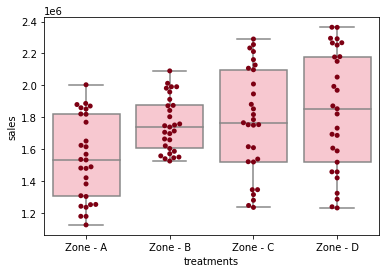

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='sales', data=data_melt, color='pink')
ax = sns.swarmplot(x='treatments', y='sales', data=data_melt, color='#7d0013')
plt.show()

# step 4: One way anova test is performed to find f and p value to reach at interpretation,f_oneway from scipy is used for that

In [13]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(mydata['Zone - A'], mydata['Zone - B'], mydata['Zone - C'], mydata['Zone - D'])
print(fvalue, pvalue)

5.672056106843581 0.0011827601694503335


# Ordinary Least Squares (OLS) model type 2 is used for finding f and p values for comparison and to get anova table

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('sales ~ C(treatments)', data=data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),1.483058e+12,3.0,5.672056,0.001183
Residual,9.761449e+12,112.0,NaN,NaN


# Interpretation:
In Both the cases p value is 0.001183 and F value is 5.6720 ie
The p value obtained from ANOVA analysis is significant (p < 0.05) and 
F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.
therefore, we can conclude that there are significant differences among treatments(different zones sales).Hence, we can reject the Null Hypothesis – there are no significant differences among different zones sales amount.